# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         
     # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    # except:
    #     print(f"Error with city '{city}': {e}. Skipping...")
    #     pass
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | vezirkopru
Processing Record 3 of Set 1 | belyy yar
Processing Record 4 of Set 1 | grand-bassam
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | villa gesell
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | lincoln
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | pingzhuang
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | drayton valley
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | constantia
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | khandyga
Processing Record 22 of Set 1 | ytyk-kyuyel'

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,16.01,80,7,1.79,NZ,1738266874
1,vezirkopru,41.1436,35.4547,9.75,46,100,0.18,TR,1738266875
2,belyy yar,53.6039,91.3903,-22.06,92,100,1.00,RU,1738266877
3,grand-bassam,5.2118,-3.7388,28.98,80,3,3.05,CI,1738266878
4,papatowai,-46.5619,169.4708,14.99,63,96,0.50,NZ,1738266879


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,16.01,80,7,1.79,NZ,1738266874
1,vezirkopru,41.1436,35.4547,9.75,46,100,0.18,TR,1738266875
2,belyy yar,53.6039,91.3903,-22.06,92,100,1.00,RU,1738266877
3,grand-bassam,5.2118,-3.7388,28.98,80,3,3.05,CI,1738266878
4,papatowai,-46.5619,169.4708,14.99,63,96,0.50,NZ,1738266879


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

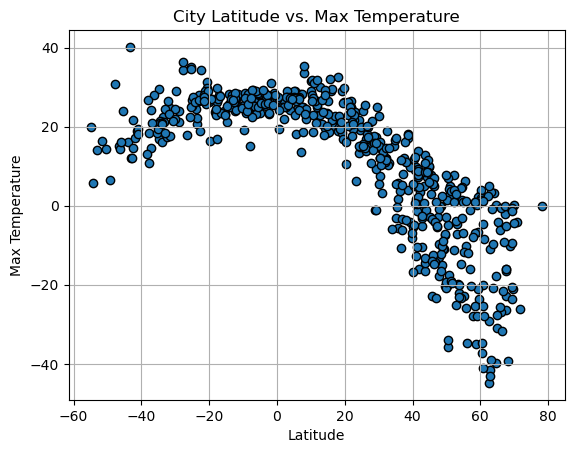

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis,edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

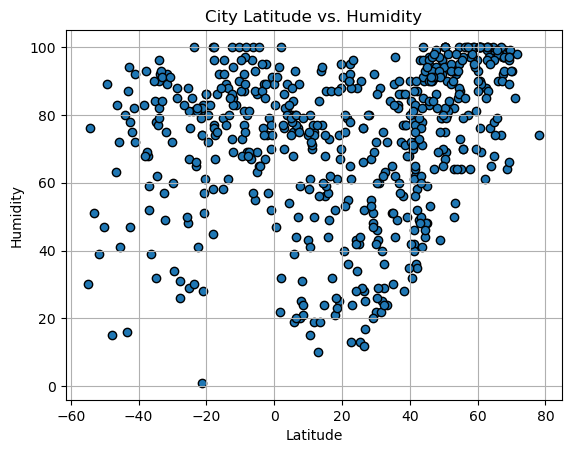

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]

plt.scatter(x_axis, y_axis,edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

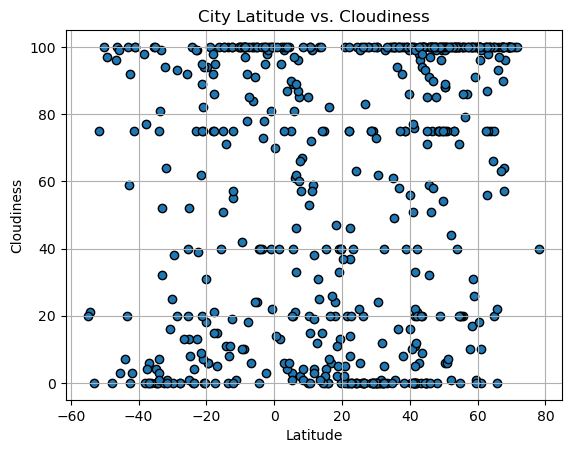

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis,edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

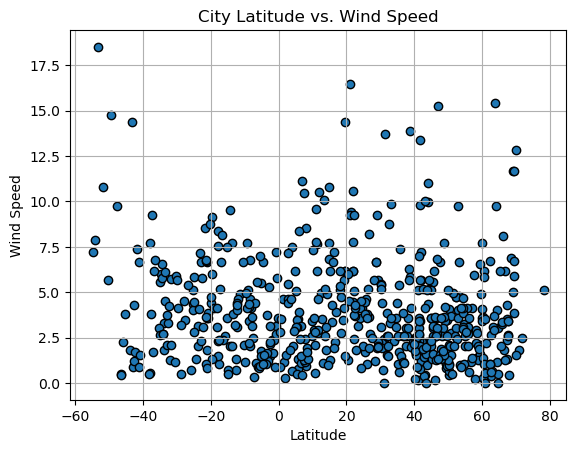

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis,edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vezirkopru,41.1436,35.4547,9.75,46,100,0.18,TR,1738266875
2,belyy yar,53.6039,91.3903,-22.06,92,100,1.00,RU,1738266877
3,grand-bassam,5.2118,-3.7388,28.98,80,3,3.05,CI,1738266878
7,lincoln,40.8000,-96.6670,8.95,78,100,1.54,US,1738266883
9,pingzhuang,42.0372,119.2889,-16.13,87,21,1.21,CN,1738266885


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,16.01,80,7,1.79,NZ,1738266874
4,papatowai,-46.5619,169.4708,14.99,63,96,0.50,NZ,1738266879
5,villa gesell,-37.2639,-56.9730,24.12,68,0,9.24,AR,1738266880
6,arraial do cabo,-22.9661,-42.0278,27.98,65,75,6.69,BR,1738266881
8,blackmans bay,-43.0167,147.3167,12.07,87,100,0.89,AU,1738266884


###  Temperature vs. Latitude Linear Regression Plot

 The r^2-value is: -0.8337194692597746


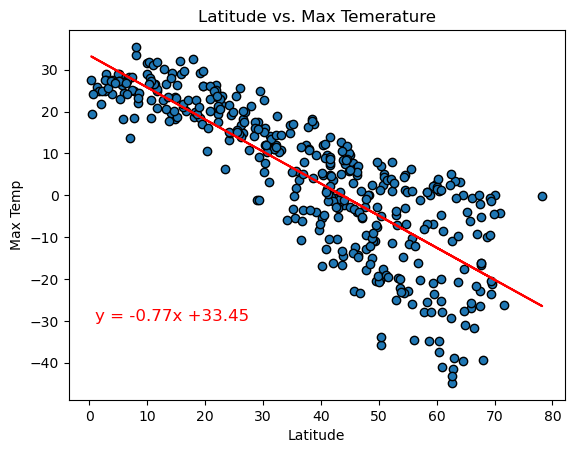

In [16]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(1, -30, equation, fontsize=12, color='red')
                                                         
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Max Temerature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f' The r^2-value is: {r_value}')
plt.show()



 The r^2-value is: 0.5374372966096229


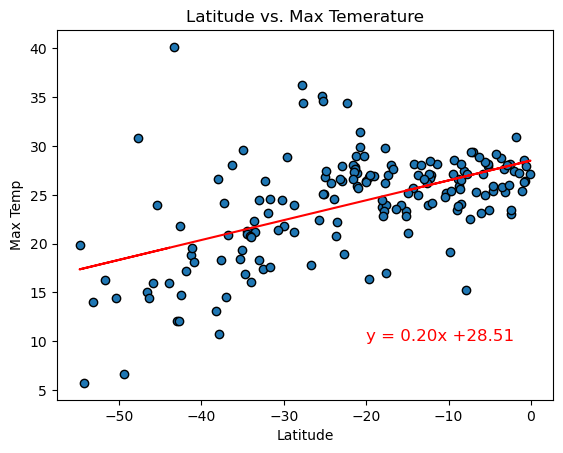

In [17]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(-20, 10, equation, fontsize=12, color='red')

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Max Temerature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f' The r^2-value is: {r_value}')
plt.show()



**Discussion about the linear relationship:** 
As latitude deceases (moving closer to the South Pole), the temperature also tends to decrease. The R^2 value (0.537) shows moderate connection, meaning latitude affects temperature but other factors also play a role, like weather and altidue.

### Humidity vs. Latitude Linear Regression Plot

 The r^2-value is: 0.4516747867064104


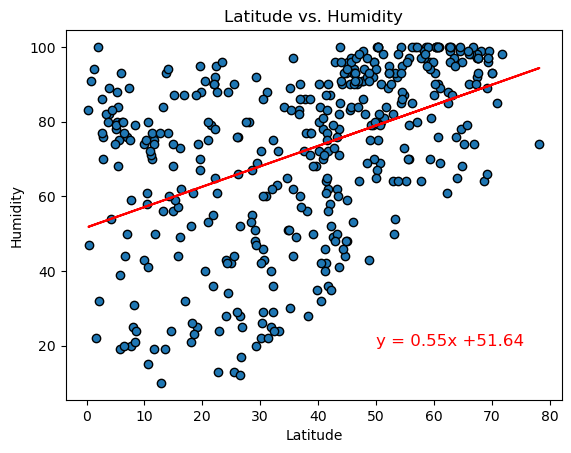

In [18]:
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(50, 20, equation, fontsize=12, color='red')

# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f' The r^2-value is: {r_value}')
plt.show()


 The r^2-value is: 0.2880417163501396


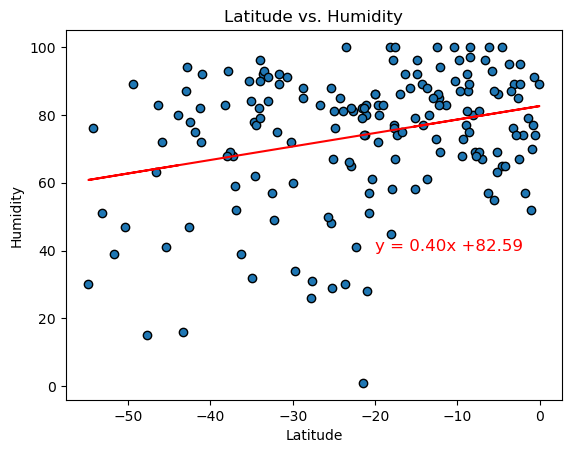

In [19]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(-20, 40, equation, fontsize=12, color='red')

# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f' The r^2-value is: {r_value}')
plt.show()


**Discussion about the linear relationship:** 
Slope: Shows how much humidity changes as latitude changes.
Intercept: The humidity at the equator (latitude = 0)
R-value (0.537): There is a moderate link between latitude and humidity.
R² value (0.288): Only 29% of the change in humidity is due to latitude.

Latitude affects humidity a little, but other factors also play a big role.

### Cloudiness vs. Latitude Linear Regression Plot

 The r^2-value is: 0.34306321743932217


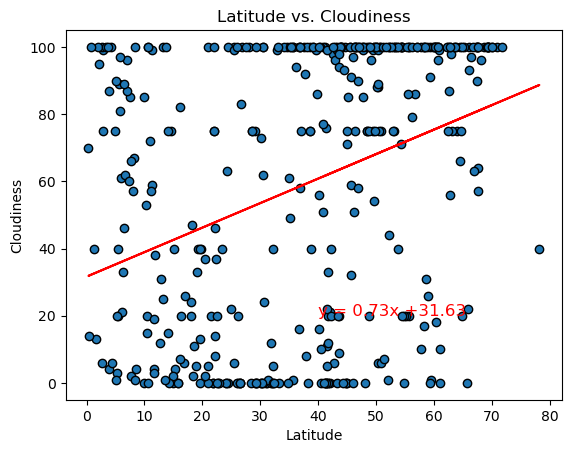

In [20]:
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(40, 20, equation, fontsize=12, color='red')

# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f' The r^2-value is: {r_value}')
plt.show()

 The r^2-value is: 0.26726136090815705


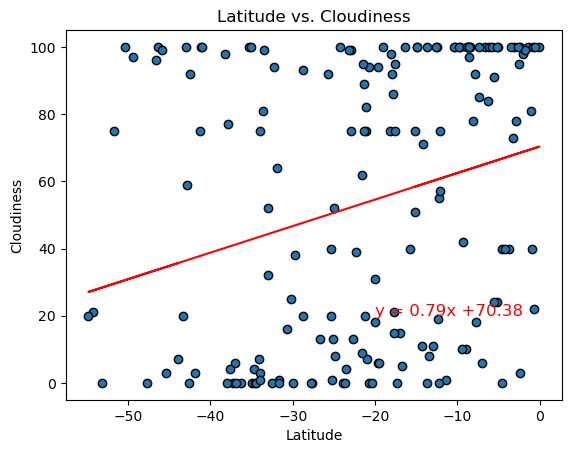

In [21]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(-20, 20, equation, fontsize=12, color='red')


# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f' The r^2-value is: {r_value}')
plt.show()

**Discussion about the linear relationship:** 
Slpoe: Shows how cloudiness changes with latitude.
Intercept: The cloudiness at the equator (latitude = 0)
R- value (0.517): There's a moderate link between latitude and cloudiness.
R² value (0.267): Latitude explains 27% of the change in cloudiness.

Latitude affects cloudiness a little, but other fators are involved. 

### Wind Speed vs. Latitude Linear Regression Plot

 The r^2-value is: -0.09840509152099144


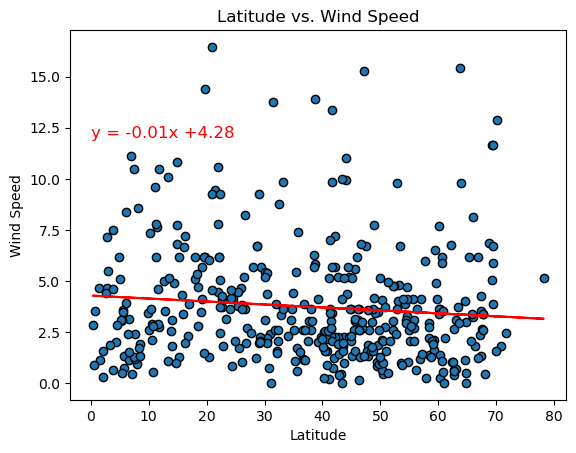

In [22]:
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(0, 12, equation, fontsize=12, color='red')


# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Wind Speed"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f' The r^2-value is: {r_value}')
plt.show()

 The r^2-value is: -0.27224688944556813


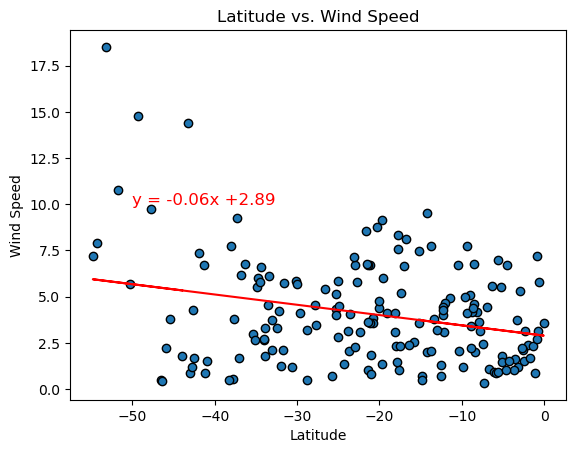

In [23]:
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation 
equation = f'y = {slope:.2f}x +{intercept:.2f}'
plt.text(-50, 10, equation, fontsize=12, color='red')



# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]

plt.scatter(x_axis, y_axis,edgecolors="black")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f' The r^2-value is: {r_value}')
plt.show()

**Discussion about the linear relationship:** 
Slope: Shows how wind speed changes with latitude.
Intercept: The wind speed at the equator.
R-value (-0.517): There's a moderate negative link- wind speed changes in the opposite direction as latitude.
R² value (0.272): Latitude explains 27% of the change in wind speed.

Latitude affects wind speed a bit, but other things also play a role. The link is moderate and negative. 